# Breast Cancer Prediction with Machine Learning


### 1. Motivation

Breast cancer is the most common type of cancer in women around the world and the second highest in terms of mortality rates, and is normally detected when an abnormal lump or a tiny speck of calcium are found (from self-examination or x-ray). Early detection of this kind of cancer can greatly improve survival chances by promoding clinical treatment to patients as soon as possible. That said, the main purpose of the this post is to predict wether a lump is benign or malign through data analysis.

All Information and data related to this problem can be found here:
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/

### 2. Data Information
Ten real-valued features are computed for each cell nucleus. 

***radius*** (mean of distances from center to points on the perimeter)

***texture*** (standard deviation of gray-scale values)

***perimeter***

***area***

***smoothness*** (local variation in radius lengths)

***compactness*** (perimeter^2 / area - 1.0)

***concavity*** (severity of concave portions of the contour)

***concave points*** (number of concave portions of the contour)

***symmetry*** 

***fractal dimension*** ("coastline approximation" - 1)

***That said, our dataset consists of 30 features, the mean, standard error and "worst" or largest (mean of the three largest values) of these ten features.***

### 3. Dependences

Here we can find the libraries we will use in order to develop a solution for this problem.<br><br>
**numpy|pandas:** Will help us treat the data.<br>
**matplotlib|seaborn:** Will help us plot the information so we can visualize it in different ways and have a better understanding of it.<br>
**sklearn:** Will provide all necessary tools to train our models and test them afterwards. <br>
**prettytable:** Will allow us to plot simple ascii tables in order to show results more aesthetically.

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.feature_selection import RFECV
from prettytable import PrettyTable
warnings.filterwarnings('ignore')

### 4. Data Cleaning 

On this section we will check for undesired values such as NaN and get our dataset prepared so we can train our models later on with proper data. We will also be looking for object data types so we can transform them into numerical values.

In [2]:
#We load the .csv and visualize the first ten rows of it, here we can also see the columns name
df = pd.read_csv("data.csv")
df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

In [3]:
#Now we want to check how many columns and rows our data has, to do so we use the function shape
df.shape

(569, 33)

In [4]:
#Now we will check for empty values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#Since we have seen we have 569 and we find there is a column (Unnamed:32) with 569 missing values, we drop it
df.dropna(axis=1, inplace=True)

In [6]:
#In order to prepare our data so machine learning algorithms "understand" it, we will make sure there are no objects in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
#Diagnosis contains M if tumour is Malign and B if Benign. We change these "object" values for 1 if Malign and 0 if Benign
df['diagnosis'].replace(['M','B'],[1,0],inplace=True)

In [8]:
#We observe values have changed
df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### 5. Data Analysis and Visualization

After having cleaned and prepared our data so it is "ready" for our models to use, we are first going to analyze it in order to understand it better through plotting important information that will help us check how features behave and how they are correlated. 

First of all, knowing our target variable is **diagnosis**, we are going to plot some information about it. Let's see which values this column contains and how many of them there are.

0    357
1    212
Name: diagnosis, dtype: int64

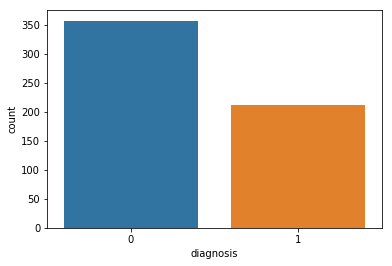

In [9]:
#let's start visualizing the amount of Malignant and Benignant tumours in our dataset
sns.countplot(df['diagnosis'])
df['diagnosis'].value_counts()

As we see, approximately the 40% of tumours are detected as Malign while the 60% of them seem to be Bening. This might help us classify since both classes are almost equally represented.

#### Data Correlation

Now let's look at how some features are related to having a benign or malign tumour. To do so, we are first going to plot a graph that will allow us to see how correlated features are with diagnosis.

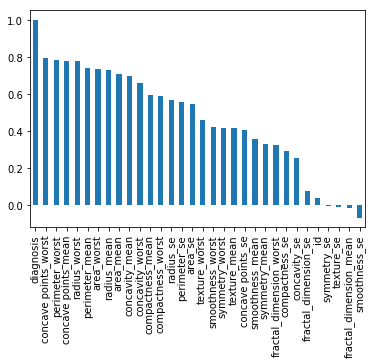

In [10]:
#Plot correlations with diagnosis column
corr = df.corr()['diagnosis'].sort_values(ascending=False)
corr.plot(kind='bar')

As we can see, almost every feature correlates positively with the diagnosis column and, these correlations are quite impressive, showing us there are quite some factors to take into account when deciding wether a tumour is benign or malign. That said we will do further investigations to those features whose correlation with diagnosis is greater than 0,6. In order to do so, we first need to check which features meet this requirement.

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


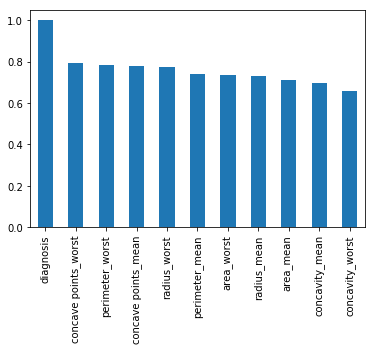

In [11]:
#Plot only correlations greater than 0.6
corr[corr >= 0.6].plot(kind='bar')
print(corr[corr >= 0.6])

Now that we know the most important features in this dataset, let's plot the correlation matrix to see how all features correlate with each other.

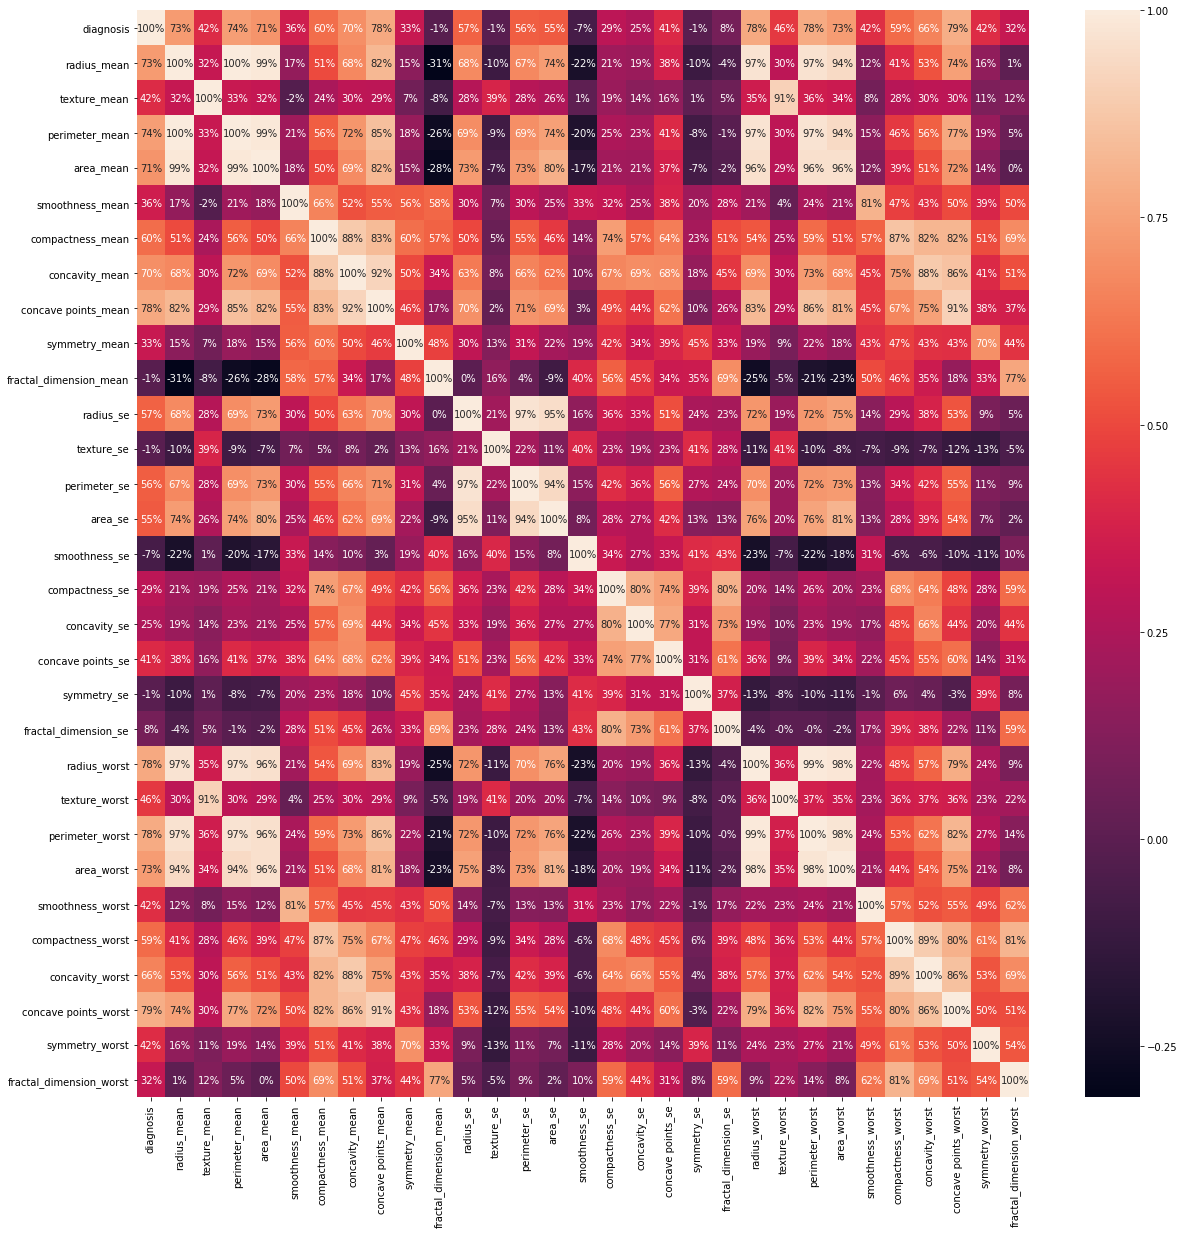

In [12]:
#plot correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,1:32].corr(), annot=True, fmt='.0%')

#### Data Standarization

Having observed all the correlation between features, we are going to investigare a little bit more the ten features we selected before, these being "concave points_worst", "perimeter_worst", "concave points_mean", "radius_worst", "perimeter_mean", "area_worst", "radius_mean", "area_mean" ,"concavity_mean", "concavity_worst". However, before we do that, let's take a look at some of our data values.

In [13]:
i_features = df.loc[:,["concave points_worst", "perimeter_worst", "concave points_mean", "radius_worst", "perimeter_mean", "area_worst", "radius_mean", "area_mean" ,"concavity_mean", "concavity_worst"]]
i_features.describe()

concave points_worst  perimeter_worst  concave points_mean  \
count            569.000000       569.000000           569.000000   
mean               0.114606       107.261213             0.048919   
std                0.065732        33.602542             0.038803   
min                0.000000        50.410000             0.000000   
25%                0.064930        84.110000             0.020310   
50%                0.099930        97.660000             0.033500   
75%                0.161400       125.400000             0.074000   
max                0.291000       251.200000             0.201200   

       radius_worst  perimeter_mean   area_worst  radius_mean    area_mean  \
count    569.000000      569.000000   569.000000   569.000000   569.000000   
mean      16.269190       91.969033   880.583128    14.127292   654.889104   
std        4.833242       24.298981   569.356993     3.524049   351.914129   
min        7.930000       43.790000   185.200000     6.981000   143.500000   
25%       13.010000       75.170000   515.300000    11.700000   420.300000   
50%       14.970000       86.240000   686.500000    13.370000   551.100000   
75%       18.790000      104.100000  1084.000000    15.780000   782.700000   
max       36.040000      188.500000  4254.000000    28.110000  2501.000000   

       concavity_mean  concavity_worst  
count      569.000000       569.000000  
mean         0.088799         0.272188  
std          0.079720         0.208624  
min          0.000000         0.000000  
25%          0.029560         0.114500  
50%          0.061540         0.226700  
75%          0.130700         0.382900  
max          0.426800         1.252000

It can be observed by just looking at "max" values, concave points_worst max value is 0,291 while area_mean, for example, is 2501. That means if we want to group and show features together we really need to standarize or normalize our data so the difference between values isn't that big. 

In this particular case, we choose to standarize data.

In [14]:
#Data standarization and plotting information related to values
standarized_df = (i_features - i_features.mean()) / (i_features.std()) 

#### Data Plotting

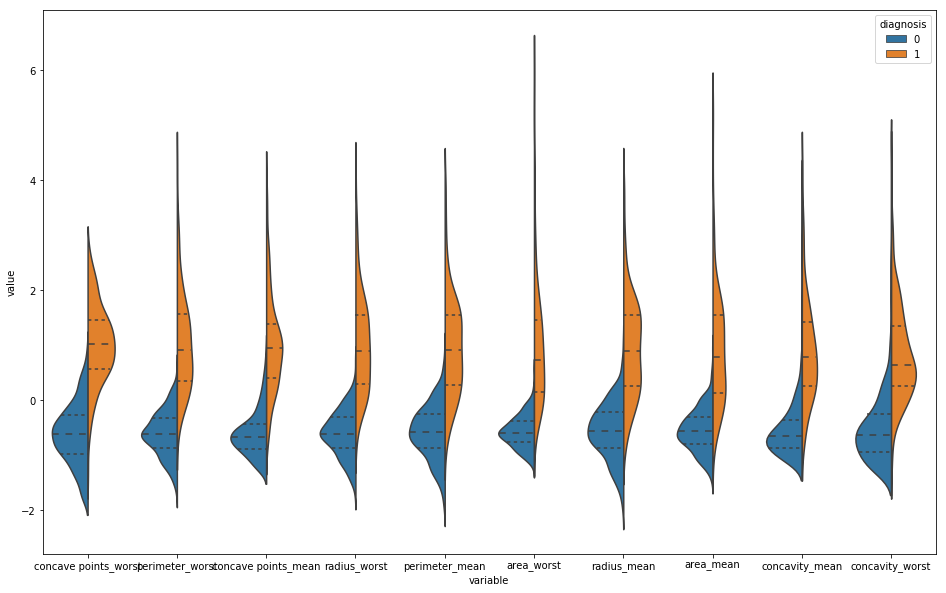

In [15]:
#Violinplotting data
i_dia = df.diagnosis
standarized_df = pd.concat([i_dia,standarized_df],axis=1)
melted_data = pd.melt(standarized_df, id_vars = "diagnosis")
plt.figure(figsize = (16,10))
sns.violinplot(x = "variable", y = "value", hue="diagnosis", data = melted_data, split=True, inner="quartile")
plt.show()

As we can see, it seems that the higher the values of these features the higher the chance the tumor is Malignant, that's how we can visually observe and confirm the positive correlation between these features and our diagnosis. Additionally, from the violinplot we can also see how "separated" are the benignant and malignant values, meaning these chosen features are a well representation of values distribution. 

Now let's plot the histogram of these values so we can better observate their values and data distribution. In order to do so, we are going to separate, for each histogram, the values depending on the diagnosis column.

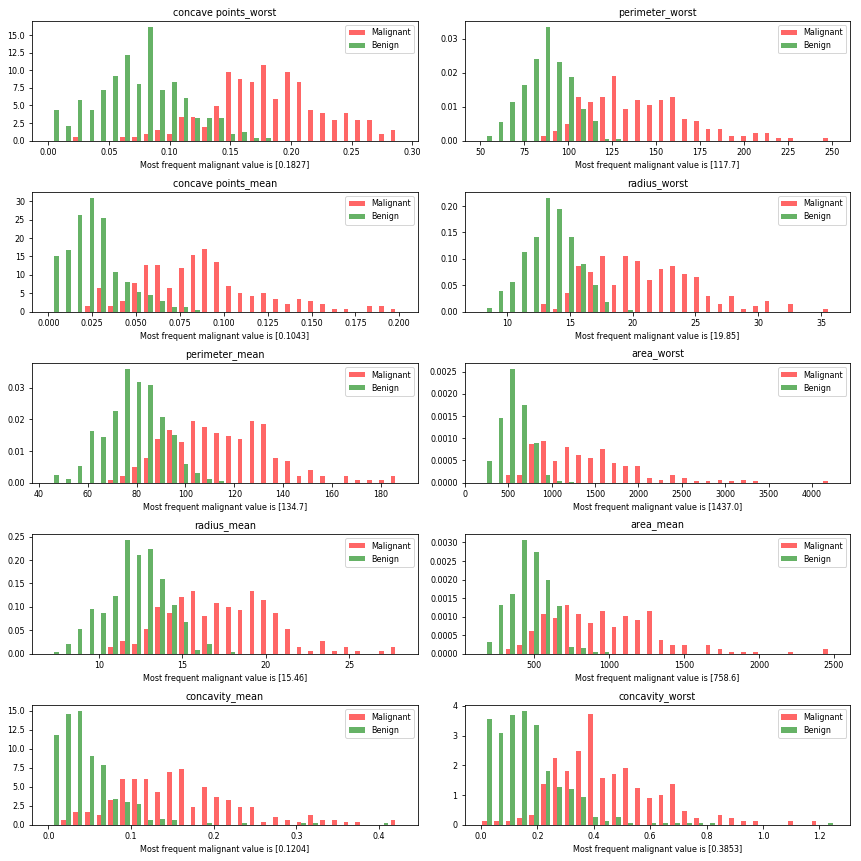

In [16]:
#Here we are going to plot the histograms of the features we selected before and the most frequent malignant tumour value
flistt = ["concave points_worst", "perimeter_worst", "concave points_mean", "radius_worst", "perimeter_mean", "area_worst", "radius_mean", "area_mean" ,"concavity_mean", "concavity_worst"]
malignant = df[df['diagnosis'] ==1]
benign = df[df['diagnosis'] == 0]
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows= 5, ncols= 2, figsize=(12,12))
graphs = graphs.flatten()
for i, graph in enumerate(graphs):
    graph.figure
    graph.hist([malignant[flistt[i]],benign[flistt[i]]], bins=30, normed = True, alpha=0.6, label=['Malignant','Benign'], color=['red','green'])
    graph.legend(loc='upper right')
    graph.set_xlabel("Most frequent malignant value is " + str([malignant[flistt[i]].value_counts().idxmax()]))
    graph.set_title(flistt[i])
plt.tight_layout()

From these ten graphs we can observe, as we said before, these features might be useful in predicting whether a patient has cancer or not due to the distinct grouping between malignant and benign. We can also see the most frequent malignant value of these features under each graph, although visually they may vary since we might not have an optimal bin width, bust most of them match with the values histograms show.

### 6. Feature selection

Feature selection is the process where we automatically or manually select those features that really help when making predictions, since they have a decent correlation with the target variable. It is one of the core concepts in machine learning since it really impacts the performance of our model and can also prevent overfitting, improve accuracy and reduce training time. For example, on this problem feature selection might very important since having a machine learning algorithm with 200 features and an accuracy of 97% or having another algorithm with 10 features and an accuracy of 96%, it is pretty clear we should go for the second one, since being able to detect wether a tumor is benign or malign with only a few features instead of way more can save us a pretty decent amount of time and ease things.


In order to do this feature selection we are going to use two different methods. In the first method we are going to manually select the features we want to train our models with, which will be the same ten features we selected before, and in the second method we will automatically select them by using recursive feature elimination from random forest. 

We will use three different algorithms to train our models with our manually selected data and, after that, we are going to select the best one and compare its results with the results obtained with automatic selection.

### 7. Classification

### Manually Selected Features

Before doing any kind of training we need to select the features we want to train our algorithms with and separe them from the target variable. In order to do so we are going to split our data into training and set using the function train_test_split.

In [17]:
#Data separation
y = df.iloc[:,1]
x = df.loc[:,["concave points_worst", "perimeter_worst", "concave points_mean", "radius_worst", "perimeter_mean", "area_worst", "radius_mean", "area_mean" ,"concavity_mean", "concavity_worst"]]

In [18]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### Support Vector Machine

In [19]:
#We will train our model with different parameters and the best "combination" will be selected
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(x_train, y_train)
print(clf.best_estimator_)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [20]:
#Print some metrics in a table
ptbl = PrettyTable()
ptbl.field_names = ["Accuracy", "Recall", "F1Score"]
ptbl.add_row([accuracy_score(y_test,clf.predict(x_test)),
          recall_score(y_test, clf.predict(x_test)), f1_score(y_test, clf.predict(x_test))])
print(ptbl)

+--------------------+--------------------+--------------------+
|      Accuracy      |       Recall       |      F1Score       |
+--------------------+--------------------+--------------------+
| 0.9707602339181286 | 0.9682539682539683 | 0.9606299212598425 |
+--------------------+--------------------+--------------------+


#### Gaussian Naive Bayes

In [21]:
g_nb = GaussianNB()
g_nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
#Print some metrics in a table
ptbl = PrettyTable()
ptbl.field_names = ["Accuracy", "Recall", "F1Score"]
ptbl.add_row([accuracy_score(y_test,g_nb.predict(x_test)),
           recall_score(y_test, g_nb.predict(x_test)), f1_score(y_test, g_nb.predict(x_test))])
print(ptbl)

+--------------------+--------------------+-------------------+
|      Accuracy      |       Recall       |      F1Score      |
+--------------------+--------------------+-------------------+
| 0.9590643274853801 | 0.9206349206349206 | 0.943089430894309 |
+--------------------+--------------------+-------------------+


#### Decision Tree

In [23]:
#Decision tree using entropy
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [24]:
#Print some metrics in a table
ptbl = PrettyTable()
ptbl.field_names = ["Accuracy", "Recall", "F1Score"]
ptbl.add_row([accuracy_score(y_test,decision_tree.predict(x_test)),
           recall_score(y_test, decision_tree.predict(x_test)), f1_score(y_test, decision_tree.predict(x_test))])
print(ptbl)

+-------------------+--------------------+--------------------+
|      Accuracy     |       Recall       |      F1Score       |
+-------------------+--------------------+--------------------+
| 0.935672514619883 | 0.9206349206349206 | 0.9133858267716536 |
+-------------------+--------------------+--------------------+


### Automatically Selected Features

Having trained our models with manually selected data we obtained some good results. Now we are going to follow the same steps but using recursive feature elimination with cross validation and random forest in order to check how many of these features we do really need in order to have the optimal accuracy in our model. In order to do so, we will use our original data with all features and we're going to split it again.

In [25]:
yrf = df.iloc[:,1]
xrf = df.iloc[:,2:31]
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(xrf, yrf, test_size=0.3, random_state=42)

In [26]:
random_forest = RandomForestClassifier() 
rfecv = RFECV(estimator=random_forest, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(xrf_train, yrf_train)
print('Total features selected:', rfecv.n_features_)
print('Selected features:', xrf_train.columns[rfecv.support_])

Total features selected: 22
Selected features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'concavity_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')


In [27]:
#Print some metrics in a table
ptbl = PrettyTable()
ptbl.field_names = ["Accuracy", "Recall", "F1Score"]
ptbl.add_row([accuracy_score(yrf_test,rfecv.predict(xrf_test)),
           recall_score(yrf_test, rfecv.predict(xrf_test)), f1_score(yrf_test, rfecv.predict(xrf_test))])
print(ptbl)

+--------------------+--------------------+-------------------+
|      Accuracy      |       Recall       |      F1Score      |
+--------------------+--------------------+-------------------+
| 0.9590643274853801 | 0.9206349206349206 | 0.943089430894309 |
+--------------------+--------------------+-------------------+


### 8. Results

Apart from the scores we have shown in the last section, it's time that we make predictions using our models. In order to do so, we are going to select the support vector machine model (since it's the one, in manual feature selection, we obtained the best results) and compare it with our random forest that automatically selects the "optimal" features.

These predictions will be plotted as confusion matrices showing the relation between predicted and true values, that way we can clearly and visually observe True/False Positives and Negatives.

#### Support Vector Machine

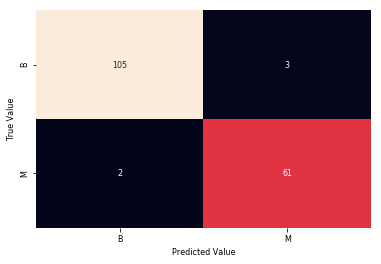

In [28]:
#Confussion Matrix for the SVM
label_aux = plt.subplot()
svm_prediction = clf.predict(x_test)
cm_svm = confusion_matrix(y_test,svm_prediction)
cm_svm_m = pd.DataFrame(cm_svm, index = ['B','M'], columns = ['B','M'])
sns.heatmap(cm_svm_m,annot=True,fmt="d", cbar=False)
label_aux.set_xlabel('Predicted Value');label_aux.set_ylabel('True Value');

#### Random Forest

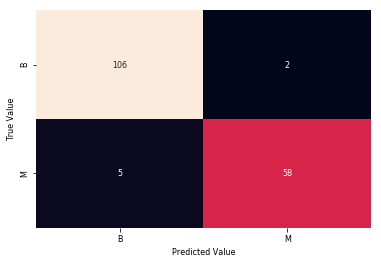

In [29]:
#Confussion Matrix for the Random Forest
label_aux = plt.subplot()
rf_prediction = rfecv.predict(xrf_test)
cm_rf = confusion_matrix(yrf_test,rf_prediction)
cm_rf_m = pd.DataFrame(cm_rf, index = ['B','M'], columns = ['B','M'])
sns.heatmap(cm_rf_m,annot=True,fmt="d", cbar=False)
label_aux.set_xlabel('Predicted Value');label_aux.set_ylabel('True Value');

### 9. Conclusions

After having obtained all the results through our models and plots, these are some things we can say about this problem and solution:
- Support Vector Machine and Random Forest classifiers seem to be the best ones in this dataset when trying to decide whether a tumour is benign or malign.
- A good amount of columns are redundant and do not give enough information at all since their correlation with diagnosis is close to none and having them in our dataset does not improve results.
- Manual feature selection can lead us to obtaining very good results if done properly, sometimes these results are even better than the onest obtained by automatical selection.
- When looking at tumour features that belong to "mean" and "worst" the ones that might give the most valuable information seem to be, especially: radius, area, perimeter, concave points and concavity.
- Around 2/3 of detected tumours are benign, so early detection can increase survival chances.
- In  order to slightly improve these results, there seems to be a kernel in Kaggle where Spearman's Rank Correlation is used instead of Pearson's (provided by the heatmap) and seems to find stronger correlations since the relationship between variables isn't linear at all. However, the results barely change.

If someone wants to know a little bit more of this problem, the following <a href="https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization">link</a> will take you the most voted kernel on Kaggle.